In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [8]:
data_train = pd.read_csv("data/AMZN_train.csv")
data_val = pd.read_csv("data/AMZN_val.csv")
data_test = pd.read_csv('data/AMZN_test.csv')
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [9]:
def data_details(feed_data):
    print(f'Data Information:\n {feed_data.info()}\n')
    print(f'Data Details:\n {round(feed_data.describe(),2)}\n')
    print(f'No.of Rows and Columns:\n {feed_data.shape}\n')
    print(f'All columns of dataframes:\n {feed_data.columns}\n')
    print(f'Number of null values if exists: \n {feed_data.isna().sum()}\n')
    print(f'Duplicate values if any: \n {feed_data.duplicated}\n')
    plt.rcParams['figure.figsize']=(12,8)
    feed_data.plot(x='Date', y=['Open','Close','High','Low'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB
Data Information:
 None

Data Details:
           Open     High      Low    Close  Adj Close        Volume
count  4781.00  4781.00  4781.00  4781.00    4781.00  4.781000e+03
mean    127.62   129.48   125.70   127.66     127.66  8.225935e+06
std     145.69   147.13   144.05   145.68     145.68  7.810188e+06
min       1.41     1.45     1.31     1.40       1.40  4.872000e+05
25%      34.30    34.85    33.66    34.31      34.31  4.200900e+06
50%      62.88    64.75    6

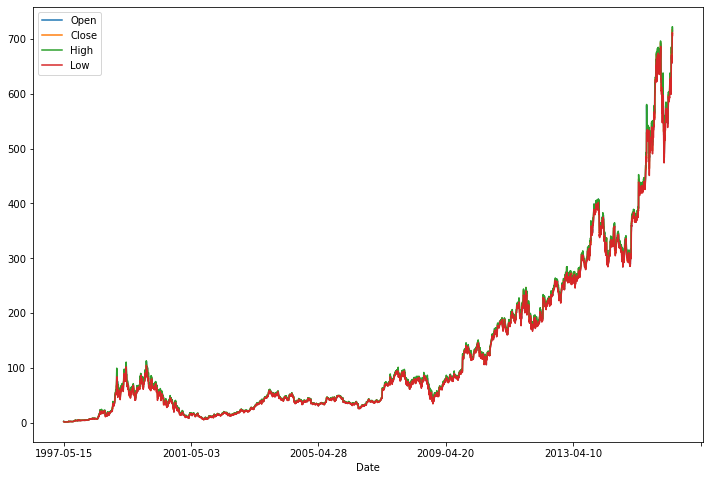

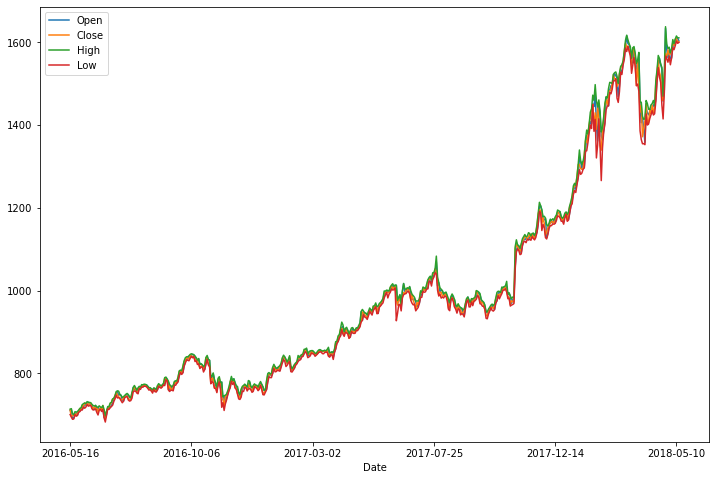

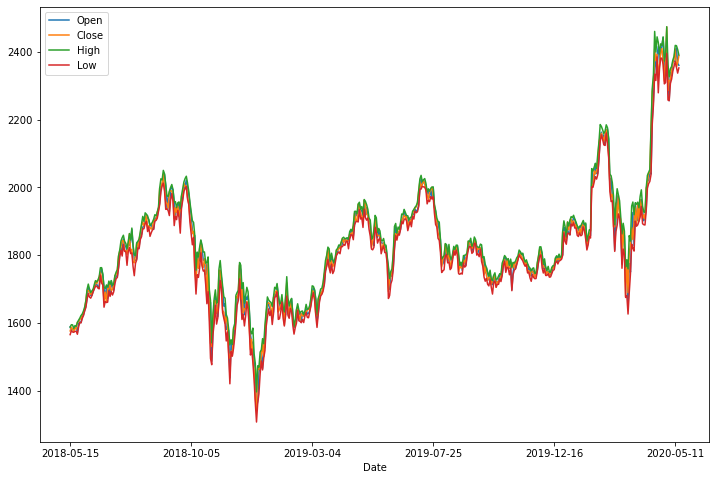

In [10]:
data_details(data_train)
data_details(data_val)
data_details(data_test)

In [11]:
data_train['Target'] = (data_train.Close>data_train.Open).shift(-1, fill_value=1).astype(int)
data_train

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0
...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0


In [12]:
data_train.Target.value_counts()

1    2393
0    2388
Name: Target, dtype: int64